In [6]:
import pandas as pd
from urllib.parse import urlparse,urlencode
import ipaddress
import re
import requests
from urllib.parse import urlparse

In [7]:
df = pd.read_csv("/content/malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [8]:
legitimate_urls = df[df['type'] == 'benign']['url'].tolist()

In [ ]:
print(legitimate_urls)




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
dfL = pd.DataFrame(legitimate_urls)

In [10]:
print(dfL)


                                                       0
0                    mp3raid.com/music/krizz_kaliko.html
1                        bopsecrets.org/rexroth/cr/1.htm
2      http://buzzfil.net/m/show-art/ils-etaient-loin...
3          espn.go.com/nba/player/_/id/3457/brandon-rush
4         yourbittorrent.com/?q=anthony-hamilton-soulife
...                                                  ...
88434  imortuary.com/funeral-homes/new-jersey/long-br...
88435  moviefone.com/celebrity/luigi-lo-cascio/203523...
88436  ticketluck.com/venues/Olympiahalle---Munich/in...
88437                   docstoc.com/docs/68025457/am2009
88438                             stmichael-stpeter.org/

[88439 rows x 1 columns]


In [11]:
phish_urls = df[df['type'] == 'phishing']['url'].tolist()
malware_urls = df[df['type'] == 'malware']['url'].tolist()
defacement_urls = df[df['type'] == 'defacement']['url'].tolist()

phishing_urls = phish_urls + malware_urls + defacement_urls


In [12]:
dfP = pd.DataFrame(phishing_urls)

In [13]:
print(dfP)

                                                       0
0                                       br-icloud.com.br
1             signin.eby.de.zukruygxctzmmqi.civpro.co.za
2      http://www.marketingbyinternet.com/mo/e56508df...
3      https://docs.google.com/spreadsheet/viewform?f...
4                                   retajconsultancy.com
...                                                  ...
32358                  http://cherubwings.com/disclaimer
32359  http://r-tuning.com.ua/index.php?page=shop.bro...
32360  http://www.khack.be/index.php?option=com_conte...
32361  http://naadbank.com/index.php?option=com_conte...
32362  http://www.centercamping.com.br/index.php?opti...

[32363 rows x 1 columns]


*** CHECKING FOR AN IP ADDRESS IN DOMAIN***

In [14]:
'''def getDomain(url):
  url_str = str(url)
  return re.search('(https?://)?(www\d?\.)?(?P<name>[\w-]+)\.', url_str).group('name')
 #url_str = str(url)
 # domain = urlparse(url_str).netloc
 # if re.match(r"^www.",domain):
   # domain = domain.replace("www.","")'''

 # return domain
def getDomain(url):

  url_str = str(url)
  match = re.search('(https?://)?(www\d?\.)?(?P<name>[\w-]+)\.', url_str)
  if match:
      return match.group('name')
  else:
      return None


  


In [15]:
def IP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

*** CHECKING FOR HTTPS AND HTTP IN DOMAIN***

In [16]:
def httpDomain(url):
  url_str = str(url)
  domain = urlparse(url_str).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

***CHECKING FOR HYPHEN IN DOMAIN***

In [17]:
def hyphen(url):
    url_str = str(url)
    if '-' in urlparse(url_str).netloc:
        return 1          
    else:
        return 0            

***CHECKING FOR @ symbol IN DOMAIN***

In [18]:
def attherateof(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

***CHECKING THE LENGTH OF AN URL***

In [19]:
def lenofurl(url):
  if len(url) < 72 and len(url)>14:    #as url shortner makes url length to 17 characters 
    length = 0            
  else:
    length = 1            
  return length

***CHECKING FOR NUMBER OF SUBPAGES IN AN URL***

In [20]:
def depth(url):
  url_str = str(url)
  d = urlparse(url_str).path.split('/')
  depth = 0
  for i in range(len(d)):
    if len(d[i]) != 0:
      depth = depth+1
  return depth

***CHECKING FOR // SYMBOL IN AN URL WHICH HELPS TO REDIRECT***

In [21]:
def redirection(url):
  url_str = str(url)
  pos = url_str.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

***CHECKING FOR SHORTNER URL ***

In [22]:
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
     
def tinyURL(url):
    url_str = str(url)
    match=re.search(shortening_services,url_str)
    if match:
        return 1
    else:
        return 0

***CHECKING FOR IFRAME HTML TAG URL***

In [23]:
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[|]", response.text):
          return 0
      else:
          return 1

***CHECKING FOR ONMOUSEOVER EVENT URL***

In [24]:
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("", response.text):
      return 1
    else:
      return 0
     

***CHECKING FOR RIGHT CLICK ENABILATION URL***

In [25]:
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

***CHECKING IF REDIRECTING IS DONE BY AN URL***

In [26]:
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [27]:
!pip install python-whois
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime


def web_traffic(url):
  try:
   
    url_str = str(url)
    url = urlparse(url_str).netloc(url_str)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url_str).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0


def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=e098a7f7048ce5d9b58a5e8696050d07dc657f605b7bda9b079418ac3ab80818
  Stored in directory: /root/.cache/pip/wheels/e6/e9/d3/1e41a6c95b398de12c5a332ff28805aa44e68aa317ea60266d
Successfully built python-whois


In [28]:
def featureExtraction(url,label):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(IP(url))
  features.append(httpDomain(url))
  features.append(hyphen(url))
  features.append(attherateof(url))
  features.append(lenofurl(url))
  features.append(depth(url))
  features.append(redirection(url))
  features.append(tinyURL(url))
  
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features
     

In [30]:
legitimate_urls_features = []
label = 0

for i in range(0, 88439):
  
  url_str = dfL.iloc[i]
  legitimate_urls_features.append(featureExtraction(url_str,label))

     

#converting the list to dataframe
feature_names = ['Domain','Have_IP','https_Domain','Prefix/Suffix', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'TinyURL','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','label']

legitimate = pd.DataFrame(legitimate_urls_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [31]:

legitimate.to_csv('legitimate.csv', index= False)

In [33]:
phishing_urls_features = []
label = 1
for i in range(0, 32363):
  url_str = dfP.iloc[i]
  phishing_urls_features.append(featureExtraction(url_str,label))

feature_names = ['Domain','Have_IP','https_Domain','Prefix/Suffix', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'TinyURL','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','label']


phishing = pd.DataFrame(phishing_urls_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,br-icloud,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1
1,signin,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1
2,marketingbyinternet,0,0,0,0,1,4,1,1,1,1,1,1,1,1,1,1,1
3,docs,0,0,0,0,1,4,1,0,1,1,1,1,1,1,1,1,1
4,retajconsultancy,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1


In [34]:
phishing.to_csv('phishing.csv', index= False)

In [35]:
final_data = pd.concat([legitimate, phishing]).reset_index(drop=True)
final_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [36]:
final_data.to_csv('phishing_data.csv', index=False)

In [37]:
import numpy as np 
import pandas as pd 

df_data = pd.read_csv('/content/phishing_data.csv')


In [38]:
import os

df_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120802 entries, 0 to 120801
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Domain         120802 non-null  object
 1   Have_IP        120802 non-null  int64 
 2   https_Domain   120802 non-null  int64 
 3   Prefix/Suffix  120802 non-null  int64 
 4   Have_At        120802 non-null  int64 
 5   URL_Length     120802 non-null  int64 
 6   URL_Depth      120802 non-null  int64 
 7   Redirection    120802 non-null  int64 
 8   TinyURL        120802 non-null  int64 
 9   DNS_Record     120802 non-null  int64 
 10  Web_Traffic    120802 non-null  int64 
 11  Domain_Age     120802 non-null  int64 
 12  Domain_End     120802 non-null  int64 
 13  iFrame         120802 non-null  int64 
 14  Mouse_Over     120802 non-null  int64 
 15  Right_Click    120802 non-null  int64 
 16  Web_Forwards   120802 non-null  int64 
 17  label          120802 non-null  int64 
dtypes: i

In [40]:
df_data.columns

Index(['Domain', 'Have_IP', 'https_Domain', 'Prefix/Suffix', 'Have_At',
       'URL_Length', 'URL_Depth', 'Redirection', 'TinyURL', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'label'],
      dtype='object')

In [41]:
df_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [42]:
df_data.dropna(subset=['label'], inplace=True)
print(df_data.apply(lambda col: col.unique()))

Domain           [mp3raid, bopsecrets, buzzfil, espn, yourbitto...
Have_IP                                                        [0]
https_Domain                                                   [0]
Prefix/Suffix                                                  [0]
Have_At                                                        [0]
URL_Length                                                     [1]
URL_Depth                              [3, 4, 5, 7, 1, 2, 6, 8, 9]
Redirection                                                 [0, 1]
TinyURL                                                     [0, 1]
DNS_Record                                                     [1]
Web_Traffic                                                    [1]
Domain_Age                                                     [1]
Domain_End                                                     [1]
iFrame                                                         [1]
Mouse_Over                                                    

In [43]:
df_data.dropna(subset=['label'], inplace=True)

In [44]:
df_data.describe()

,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
count,120802.0,120802.0,120802.0,120802.0,120802.0,120802.000000,120802.000000,120802.000000,120802.0,120802.0,120802.0,120802.0,120802.0,120802.0,120802.0,120802.0,120802.000000
mean,0.0,0.0,0.0,0.0,1.0,3.248498,0.292719,0.058873,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.267901
std,0.0,0.0,0.0,0.0,0.0,1.243013,0.455012,0.235388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442868
min,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,0.0,0.0,0.0,0.0,1.0,2.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
50%,0.0,0.0,0.0,0.0,1.0,3.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
75%,0.0,0.0,0.0,0.0,1.0,4.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,0.0,0.0,0.0,0.0,1.0,9.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [45]:
x=df_data.drop(['Domain','label'], axis=1) ### Dependent Variables
y=df_data['label']  ### Independent Variables

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.9, random_state = 12)
X_train.shape, X_test.shape
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
     

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
     



#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
     

Decision Tree: Accuracy on training Data: 0.936
Decision Tree: Accuracy on test Data: 0.933


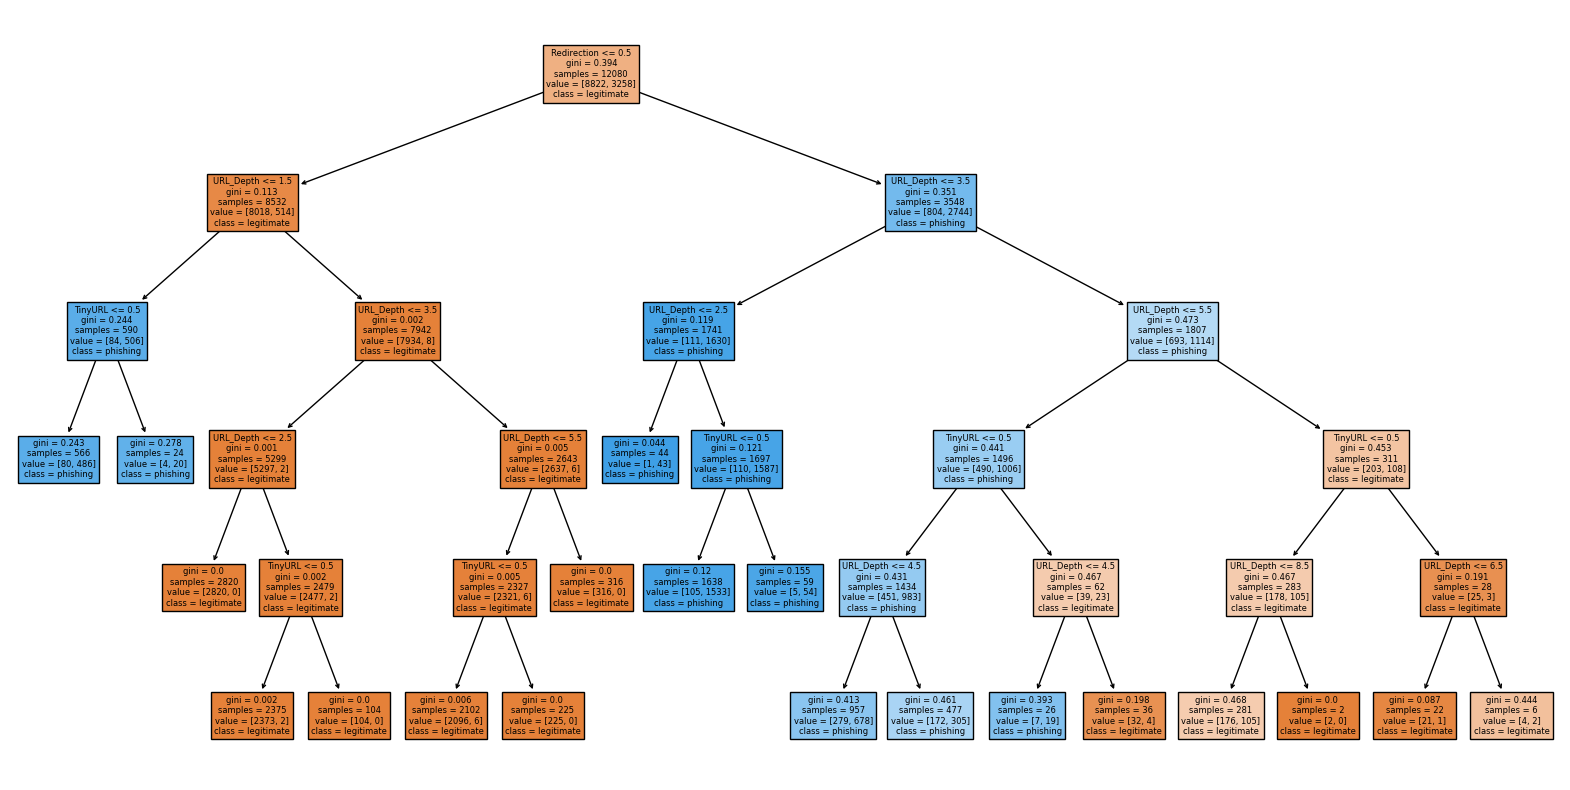

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=x.columns, class_names=['legitimate', 'phishing'], filled=True)
plt.show()


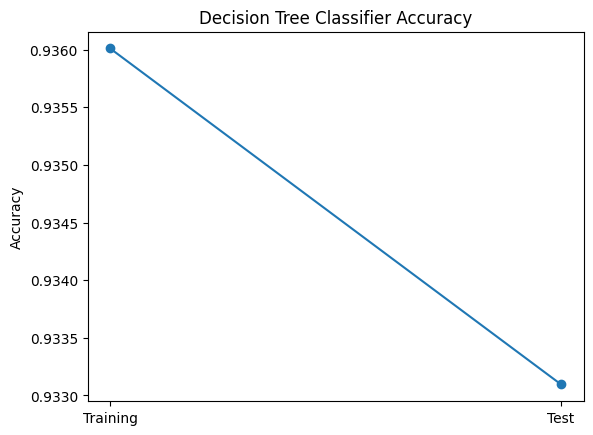

In [48]:
import matplotlib.pyplot as plt

# plot the accuracy scores for training and test sets
plt.plot([acc_train_tree, acc_test_tree], marker='o')
plt.xticks([0, 1], ['Training', 'Test'])
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()


In [49]:
print("x")

x


In [ ]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
import pickle
filename = 'physhing_model.sav'
pickle.dump(tree, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('physhing_model.sav', 'rb'))

'''
#Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2.6, 8, 10.1]]))
'''

"\n#Loading model to compare the results\nmodel = pickle.load(open('model.pkl','rb'))\nprint(model.predict([[2.6, 8, 10.1]]))\n"

In [ ]:
#import libraries
import numpy as np
from flask import Flask, render_template,request
import pickle#Initialize the flask App
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
#default page of our web-app
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
#To use the predict button in our web-app
@app.route('/predict',methods=['POST'])
def predict():
    #For rendering results on HTML GUI
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2) 
    return render_template('index.html', prediction_text='CO2    Emission of the vehicle is :{}'.format(output))

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
#x_new ="http://www.paypal.com.secure.loginauthentication.com"
#tree.predict(x_new)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
cv=cross_validate(SVC(),x,y)
print(cv)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sc',StandardScaler()),
               ('pca',PCA()),
               ('svmr',LogisticRegression()),])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(df_data.drop(['Domain','label'], axis=1),df_data['label'],test_size=0.9)
pipe.fit(xtrain,ytrain)
print(pipe.score(xtrain,ytrain))
print(pipe.score(xtest,ytest))

In [50]:
import pickle

pickle.dump(tree, open('model.pkl', 'wb'))

In [119]:
!pip install streamlit
import streamlit as st
import pickle
import numpy as np
import urllib.request

model = pickle.load(open('model.pkl', 'rb'))

def preprocess_url(url):
    url = url.encode('utf-8')
    url = urllib.parse.urlparse(url)
    url = url._replace(path = urllib.parse.quote(url.path))
    return url.geturl()

def predict_phishing(url):
    url = preprocess_url(url)
    input = np.array([[url]]).astype(np.str)
    prediction = model.predict_proba(input)
    proba = prediction[0][1]
    pred = '{0:.{1}f}'.format(proba, 2)
    return float(pred)

def main():
    st.title("Phishing Website Detection ML App")
    html_temp = """
    <div style="background-color:#025246 ;padding:10px">
    <h2 style="color:white;text-align:center;">Phishing Website Detection ML App</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    url = st.text_input("Enter URL to check for phishing", "Type Here")
    safe_html="""  
      <div style="background-color:#F4D03F;padding:10px >
       <h2 style="color:white;text-align:center;"> Legitimate Website</h2>
       </div>
    """
    danger_html="""  
      <div style="background-color:#F08080;padding:10px >
       <h2 style="color:black ;text-align:center;"> Phishing Website</h2>
       </div>
    """

    if st.button("Check"):
        output = predict_phishing(url)
        st.success('The probability of the URL being a phishing website is {}'.format(output))

        if output > 0.5:
            st.markdown(danger_html, unsafe_allow_html=True)
        else:
            st.markdown(safe_html, unsafe_allow_html=True)

if __name__=='__main__':
    main()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
!streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py www



Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 760, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/streamlit/web/cli.py", line 209, in main_run
    _main_run(target, args, flag_options=kwargs)
  File "/usr/local/lib/python3.9/dist-packages/streamlit/web/cli.py", line 245, in _main_run
    bootstrap.run(fi

In [55]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19790 sha256=0bea653f08f786a9f5a35cb7617c6728b846c8393b319e5512a0ee5db83b34d7
  Stored in directory: /root/.cache/pip/wheels/f6/89/59/49d4249e00957e94813ac136a335d10ed2e09a856c5096f95c
Successfully built pyngrok


In [56]:
%%writefile app.py

Overwriting app.py


In [112]:
!ngrok authtoken XXXXX

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [95]:
!ngrok config add-authtoken 2OEch2nqJfPc3FKaOLf6B6CT75P_PzT8scFaxiFao9MFp1Da

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [96]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [97]:
#!nohub streamlit run app.py
!streamlit run app.py&>/dev/null&

In [98]:
!pgrep streamlit

22486
29189
29962
30693


In [99]:
from pyngrok import ngrok

In [120]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.897s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [121]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.25s
your url is: https://easy-moles-wonder-34-125-112-224.loca.lt


In [114]:
publ_url=ngrok.connect(port='8085')

INFO:pyngrok.ngrok:Opening tunnel named: http-80-cc94ab4d-edbb-4859-9eaf-ae2b2060ebc2
2023-04-10 13:13:53.587 Opening tunnel named: http-80-cc94ab4d-edbb-4859-9eaf-ae2b2060ebc2
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="no configuration paths supplied"
2023-04-10 13:13:53.639 t=2023-04-10T13:13:53+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-04-10 13:13:53.649 t=2023-04-10T13:13:53+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-04-10 13:13:53.656 t=2023-04-10T13:13:53+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="starting web service" obj=web addr

PyngrokNgrokError: ignored